In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lhereader import LHEReader
from itertools import islice
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

from HiggstrahlungClassifier import *

In [51]:
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
### Import Files, convert LHE --> pd dataframe    ###
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
bkg_file = "Datasets/ee_Zbb_noH.lhe"
sig_file = "Datasets/ee_ZH_Zbb.lhe"

smear = 0.1;
df_bkg = MakeDF_bbZ(bkg_file, smear)
df_sig = MakeDF_bbZ(sig_file, smear)

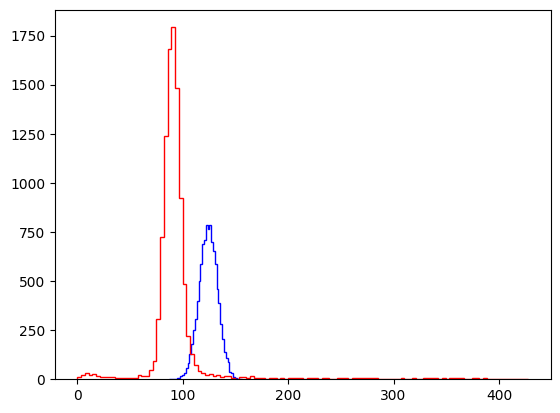

In [52]:
plt.hist(df_sig['m_bb'], bins=40, histtype='step', color='b');
plt.hist(df_bkg['m_bb'], bins=120, histtype='step', color='r');
# plt.yscale('log')

In [53]:
df_sig

,m_bb,px_Z,py_Z,pz_Z,E_Z,px_b1,py_b1,pz_b1,E_b1,px_b2,py_b2,pz_b2,E_b2
0,124.662654,-54.483132,-83.768607,201.484103,242.686395,49.494609,86.390659,-61.466272,117.103608,4.988524,-2.622053,-140.017831,140.209998
1,117.063863,95.905675,-103.365653,-175.215052,242.688941,-106.610367,50.698835,164.138824,202.236954,10.704692,52.666818,11.076227,55.074104
2,114.063568,-138.360995,-165.363326,-63.987169,242.689933,81.812471,166.482459,22.305460,186.893855,56.548524,-1.119133,41.681708,70.416212
3,128.093568,-123.804104,-184.438714,35.197744,242.691631,-12.121588,-4.036898,-20.254832,24.404460,135.925692,188.475612,-14.942911,232.903909
4,120.191255,190.692101,9.701216,118.849510,242.689201,-144.528356,42.038015,-47.978965,158.049712,-46.163745,-51.739231,-70.870544,99.261087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.839290,120.697477,166.996752,-90.153773,242.690648,-116.432853,-149.233041,118.423970,223.323613,-4.264624,-17.763712,-28.270196,33.985739
9996,131.952009,-206.888041,71.164921,52.116154,242.690034,159.569506,-38.430230,19.466621,165.349174,47.318535,-32.734691,-71.582775,91.960793
9997,129.771129,-100.555874,111.303250,167.578443,242.688449,104.112494,-131.303101,-166.745523,236.444655,-3.556620,19.999851,-0.832921,20.866896
9998,104.751139,-214.555983,-48.362292,47.012327,242.690320,212.842765,75.006676,-39.232065,229.105410,1.713218,-26.644384,-7.780262,28.204269


In [54]:
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
###   Define new DFs with different features   ###
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###

df_sig_noZ = df_sig.drop(columns=['px_Z', 'py_Z', 'pz_Z', 'E_Z'])
df_bkg_noZ = df_bkg.drop(columns=['px_Z', 'py_Z', 'pz_Z', 'E_Z'])

df_sig_nombb = df_sig.drop(columns=['m_bb'])
df_bkg_nombb = df_bkg.drop(columns=['m_bb'])

df_sig_noZ_nombb = df_sig.drop(columns=['m_bb', 'px_Z', 'py_Z', 'pz_Z', 'E_Z'])
df_bkg_noZ_nombb = df_bkg.drop(columns=['m_bb', 'px_Z', 'py_Z', 'pz_Z', 'E_Z'])

df_sig_mbb = df_sig[['m_bb']]
df_bkg_mbb = df_bkg[['m_bb']]

In [55]:
print(np.shape(df_sig_noZ_nombb))
df_sig_noZ_nombb_small = df_sig_noZ_nombb.iloc[:-9000]
df_bkg_noZ_nombb_small = df_bkg_noZ_nombb.iloc[:-9000]

print(np.shape(df_sig_noZ_nombb_small))

(10000, 8)
(1000, 8)


# Train NN 

In [56]:
es = 25
clf_all = HiggsNN(df_sig, df_bkg, epochs = es)
clf_noZ = HiggsNN(df_sig_noZ, df_bkg_noZ, epochs = es)
clf_nombb = HiggsNN(df_sig_nombb, df_bkg_nombb, epochs = es)
clf_noZ_nombb = HiggsNN(df_sig_noZ_nombb, df_bkg_noZ_nombb, epochs = es, weight_decay=0)
clf_mbb = HiggsNN(df_sig_mbb, df_bkg_mbb, epochs = es)
clf_all.fit()
clf_noZ.fit()
clf_nombb.fit()
clf_noZ_nombb.fit()
clf_mbb.fit()

X shape: (20000, 13),  y shape: (20000,)
Xtr shape: (16000, 13),  Xte shape: (4000, 13)
ytr shape: (16000,),  yte shape: (4000,)
X shape: (20000, 9),  y shape: (20000,)
Xtr shape: (16000, 9),  Xte shape: (4000, 9)
ytr shape: (16000,),  yte shape: (4000,)
X shape: (20000, 12),  y shape: (20000,)
Xtr shape: (16000, 12),  Xte shape: (4000, 12)
ytr shape: (16000,),  yte shape: (4000,)
X shape: (20000, 8),  y shape: (20000,)
Xtr shape: (16000, 8),  Xte shape: (4000, 8)
ytr shape: (16000,),  yte shape: (4000,)
X shape: (20000, 1),  y shape: (20000,)
Xtr shape: (16000, 1),  Xte shape: (4000, 1)
ytr shape: (16000,),  yte shape: (4000,)


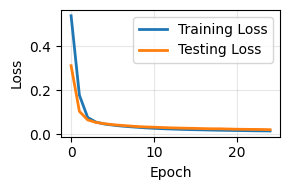

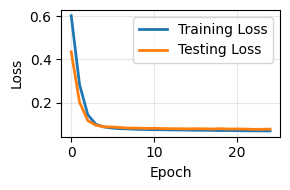

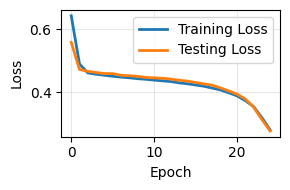

In [57]:
clf_all.plot_loss(train=True, test=True)
clf_noZ.plot_loss(train=True, test=True)
clf_noZ_nombb.plot_loss(train=True, test=True)

X shape: (2000, 8),  y shape: (2000,)
Xtr shape: (1600, 8),  Xte shape: (400, 8)
ytr shape: (1600,),  yte shape: (400,)


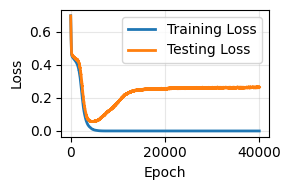

In [62]:
################ Overtraining ############## 
es = 40000
clf_noZ_nombb_small = HiggsNN(df_sig_noZ_nombb_small, df_bkg_noZ_nombb_small, epochs = es, 
                              lr=1e-4, weight_decay=0, layers_and_nodes=[32, 16, 16, 16, 16, 16])
clf_noZ_nombb_small.fit()
clf_noZ_nombb_small.plot_loss(train=True, test=True)
############################################

0.999216 0.9948682499999999 0.99941875 0.996576125


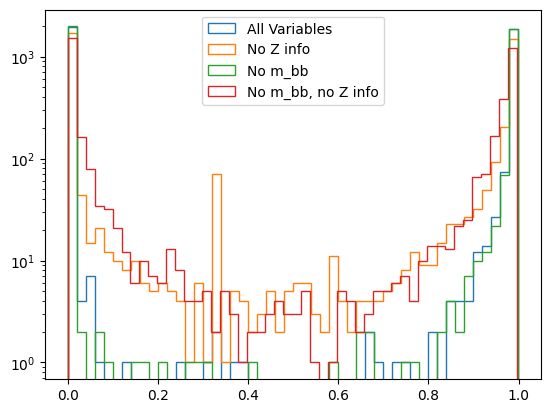

In [49]:
scores_all = clf_all.predict_scores()
scores_noZ = clf_noZ.predict_scores()
scores_nombb = clf_nombb.predict_scores()
scores_noZ_nombb = clf_noZ_nombb.predict_scores()
scores_mbb = clf_mbb.predict_scores()

bins=50
plt.hist(scores_all, bins=bins, histtype='step');
plt.hist(scores_noZ, bins=bins, histtype='step');
plt.hist(scores_nombb, bins=bins, histtype='step');
plt.hist(scores_noZ_nombb, bins=bins, histtype='step')
# plt.hist(scores_mbb, bins=bins, histtype='step')
plt.yscale('log')
plt.legend(['All Variables', 'No Z info', 'No m_bb', 'No m_bb, no Z info', 'm_bb ONLY'])
print(clf_all.roc_auc(), clf_noZ.roc_auc(), clf_nombb.roc_auc(), clf_noZ_nombb.roc_auc())